In [18]:
import gudhi
import numpy as np

from functions.data_loading import get_filtered_data_range, get_data_range, get_flight_persistence, get_removed_outliers
from functions.data_filtering import complete_flight_filter
from functions.data_filtering import filter_by_bools, filter_flights

from datetime import datetime
from collections import Counter
from tqdm import tqdm
from traffic.core import Traffic, Flight

In [19]:
origin = "bergen"
destination = "oslo"

unfiltered_flights, file_name = get_data_range(origin, destination, datetime(year=2023, month=1, day=1), datetime(year=2024, month=1, day=1))
filtered_flights, file_name = get_filtered_data_range(unfiltered_flights, file_name, complete_flight_filter(origin, destination, 0.75))
#fixed_flights, file_name = get_removed_outliers(filtered_flights, file_name)
persistences, file_name = get_flight_persistence(filtered_flights, file_name)

In [31]:
circly_flights=[]
for i, tree in enumerate(persistences):
    persistence = tree.persistence()

    more_than_00001 = len([x for x in persistence if  x[0] == 1 and x[1][1] - x[1][0] > 0.0001])
    if more_than_00001 > 0:
        circly_flights.append(i)

bool_array = np.zeros(len(persistences))
for i in circly_flights:
    bool_array[i] = 1

loopy_flights = filter_flights(filter_by_bools(bool_array), filtered_flights)
loopy_flights_pers = list(filter(filter_by_bools(bool_array), persistences))

In [21]:
from matplotlib import pyplot as plt
from collections import defaultdict

times = defaultdict(list)
for f in loopy_flights:
    time = f.data["timestamp"]
    times["month"].append(time.min().month)
    times["days"].append(time.min().day)
    times["hour"].append(time.min().hour)

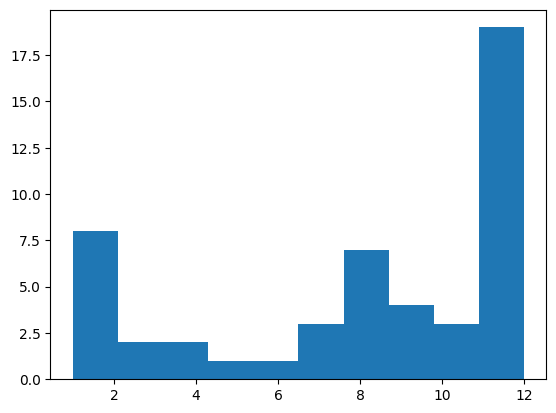

In [26]:
plt.hist(times["month"])
plt.show()

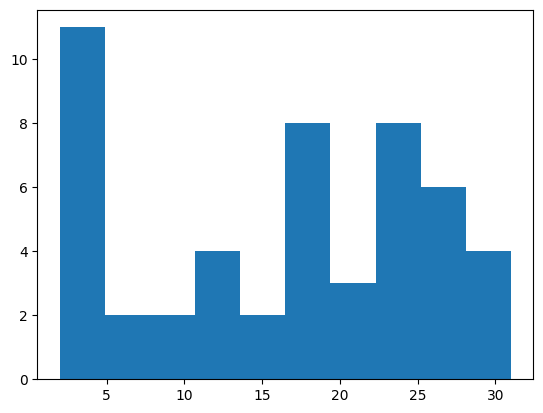

In [27]:
plt.hist(times["days"])
plt.show()

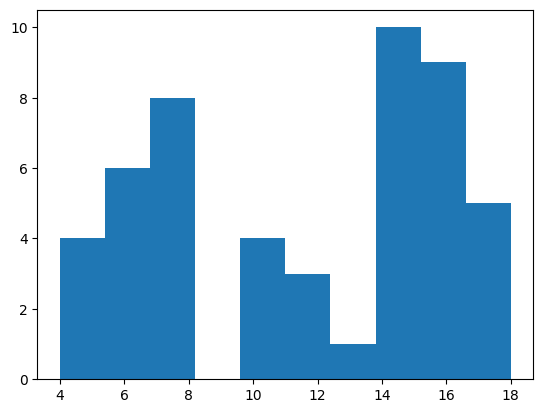

In [28]:
plt.hist(times["hour"])
plt.show()

In [29]:
from gudhi.representations import Landscape

In [131]:
landscape = Landscape(resolution=10, num_landscapes=2)
landscapes = []

for i in persistences:
    landscapes.append(landscape.fit_transform([i.persistence_intervals_in_dimension(1)]))

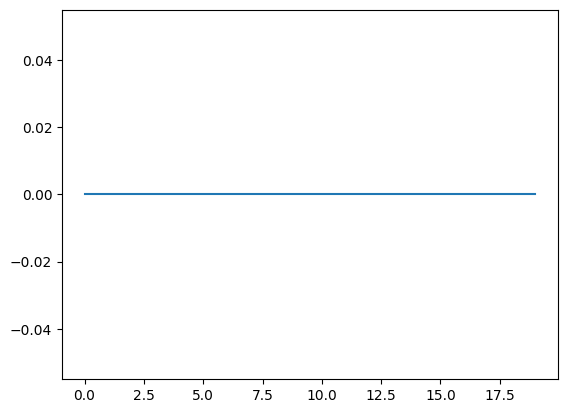

In [132]:
diagram = 8
plt.plot(landscapes[diagram][0][:20])
plt.plot(landscapes[diagram][0][20:40])
plt.plot(landscapes[diagram][0][40:60])

In [133]:
loopy_flights[8].map_leaflet()

Map(center=[60.4165869879383, 9.050312566266495], controls=(ZoomControl(options=['position', 'zoom_in_text', '…

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
from sklearn.cluster import DBSCAN

In [136]:
model = DBSCAN(eps=0.0005, min_samples=5)
clusters = model.fit(np.array(landscapes).reshape(3219, 60))

ValueError: cannot reshape array of size 64380 into shape (3219,60)

In [128]:
set(clusters.labels_)

{-1, 0, 1}

In [130]:
sum(clusters.labels_ == 1)

7